# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
%%time
results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 1, bundles = 30000000, bundle_size = 1)

CPU times: user 18 µs, sys: 6 µs, total: 24 µs
Wall time: 26.2 µs


In [3]:
%%time
#simulator.run()
simulator.run_all_waves()

CPU times: user 5.33 s, sys: 18.4 ms, total: 5.35 s
Wall time: 5.36 s


LED emitted photons: 30000000


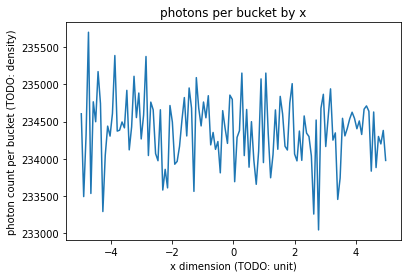

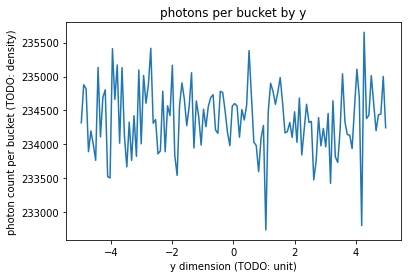

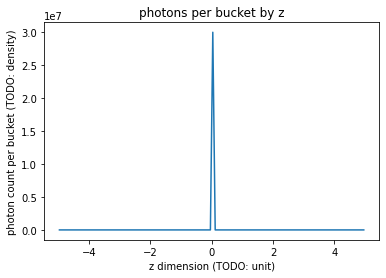

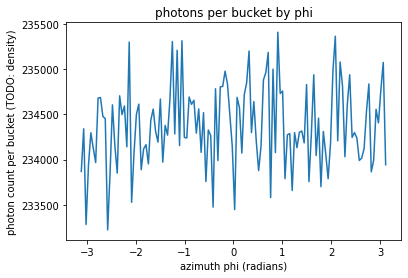

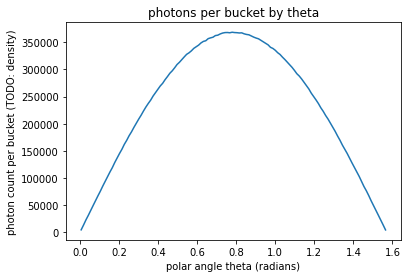

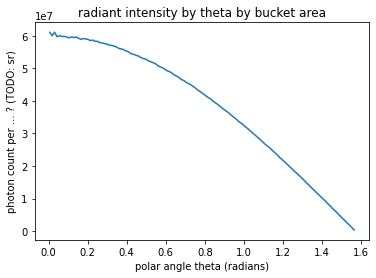

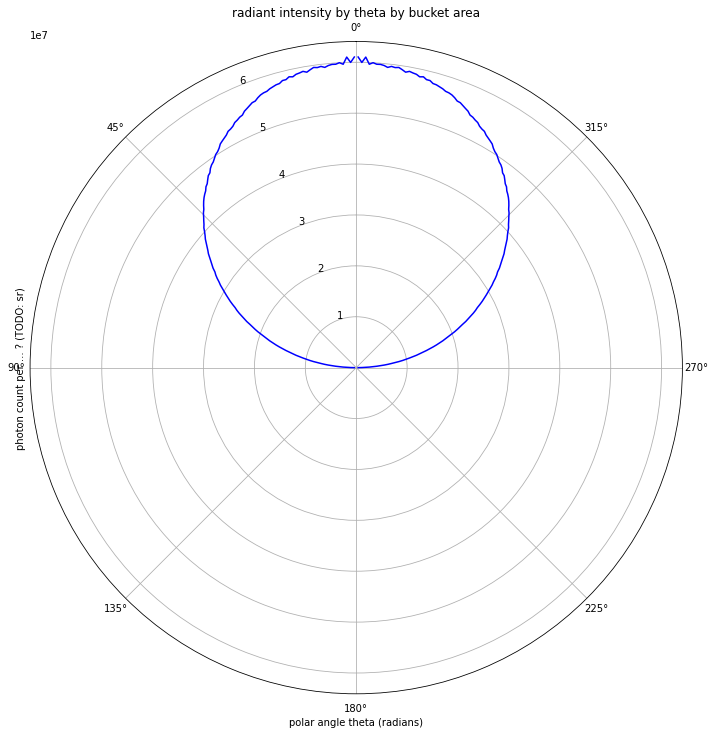

Output()

In [4]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 25353780


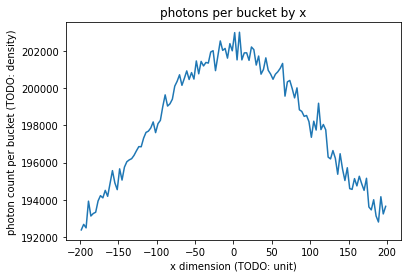

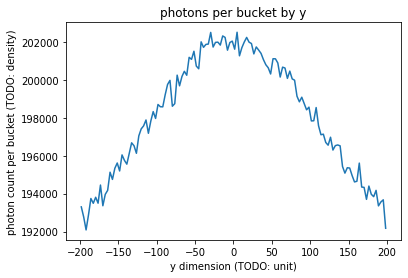

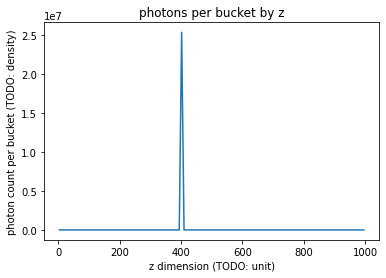

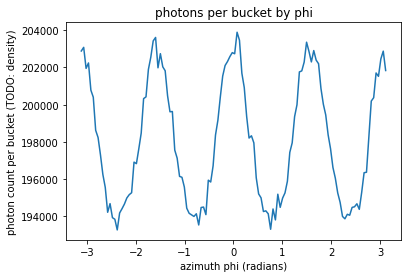

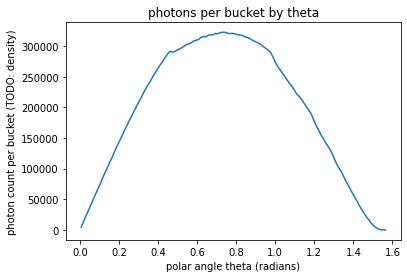

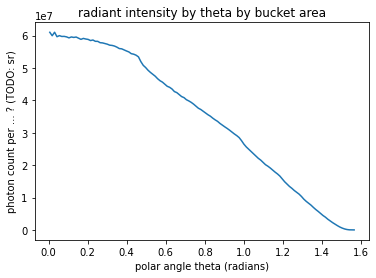

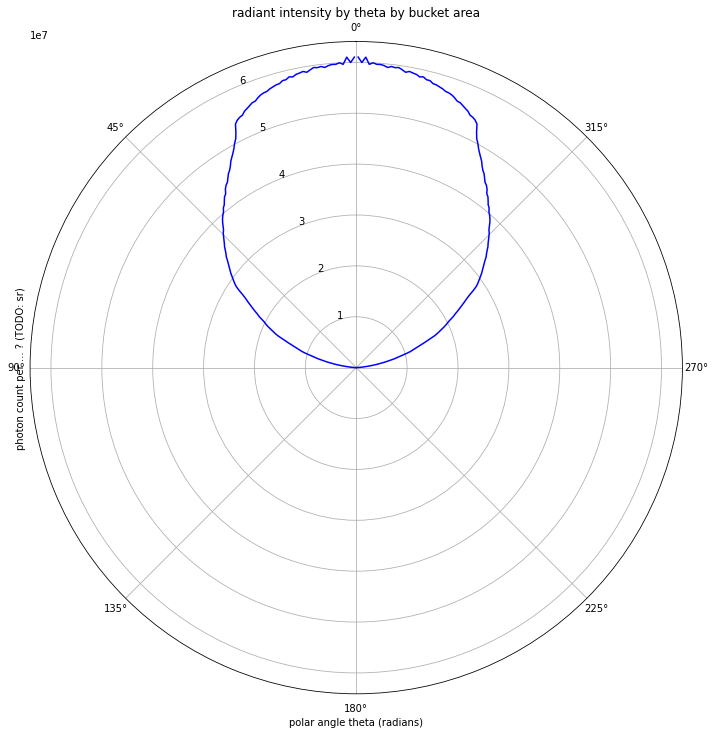

Output()

In [5]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 21298894


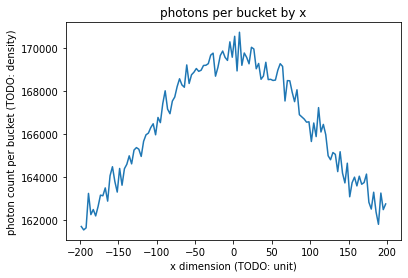

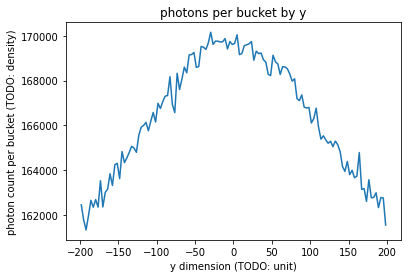

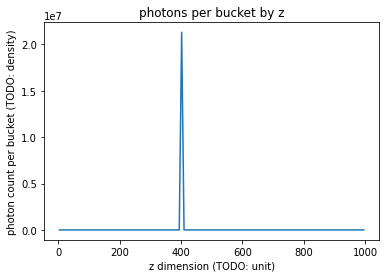

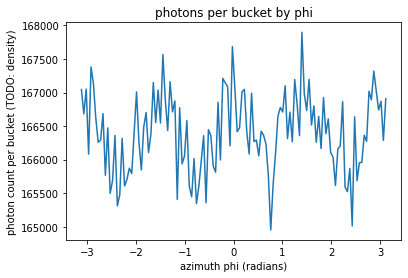

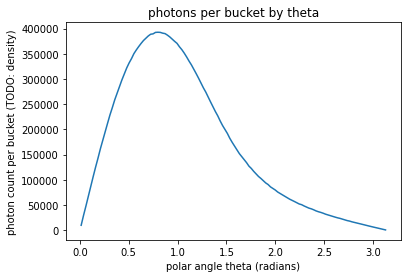

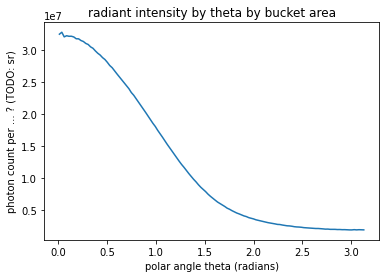

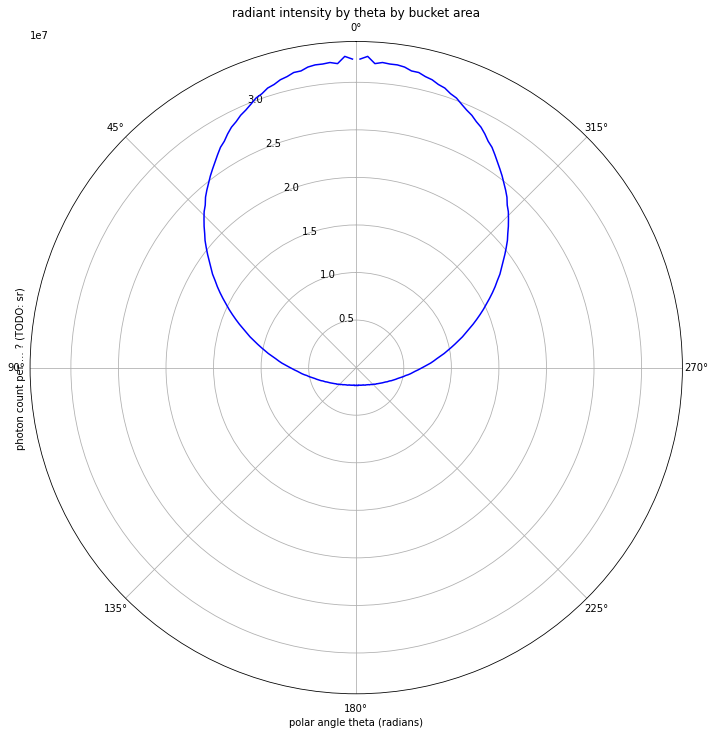

Output()

In [6]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 2019


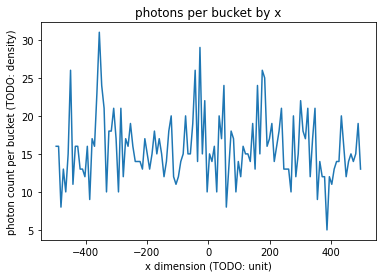

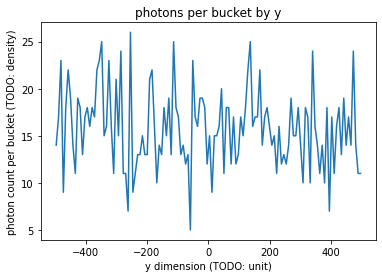

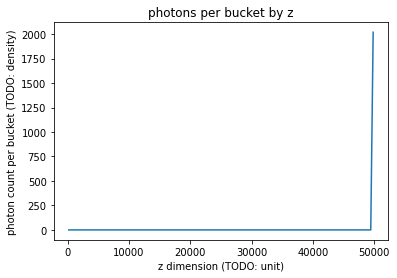

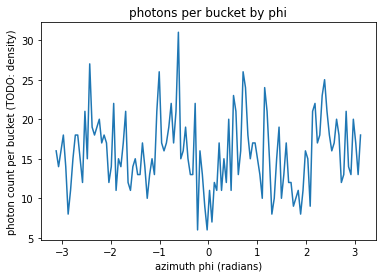

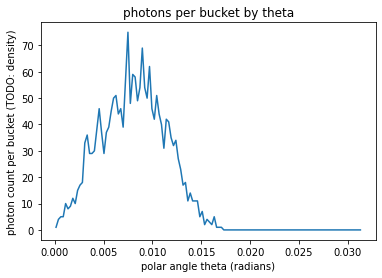

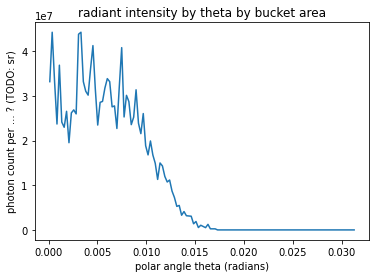

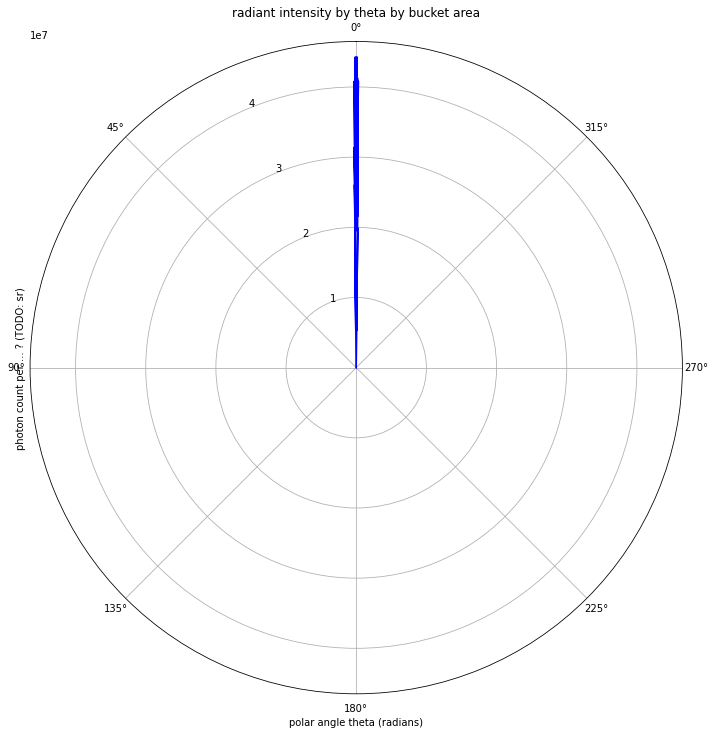

Output()

In [7]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 2019


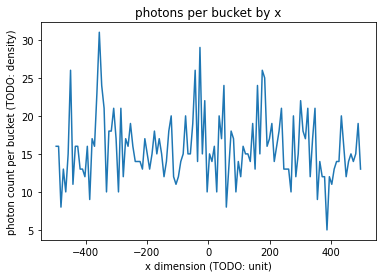

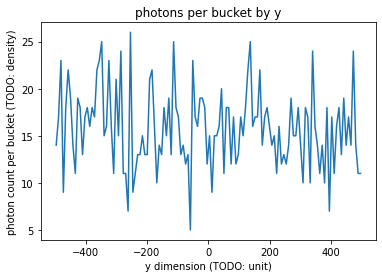

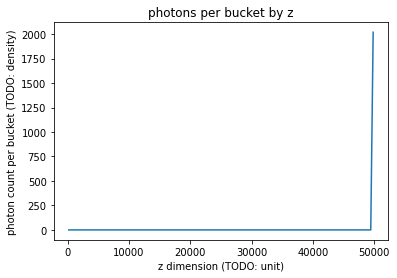

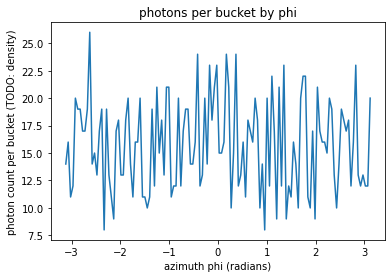

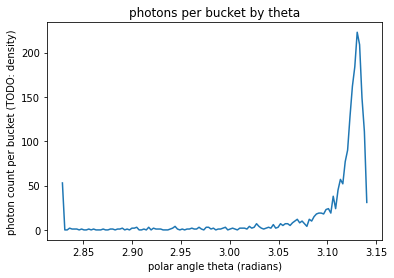

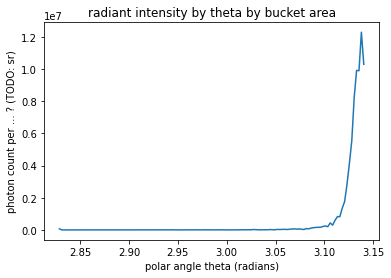

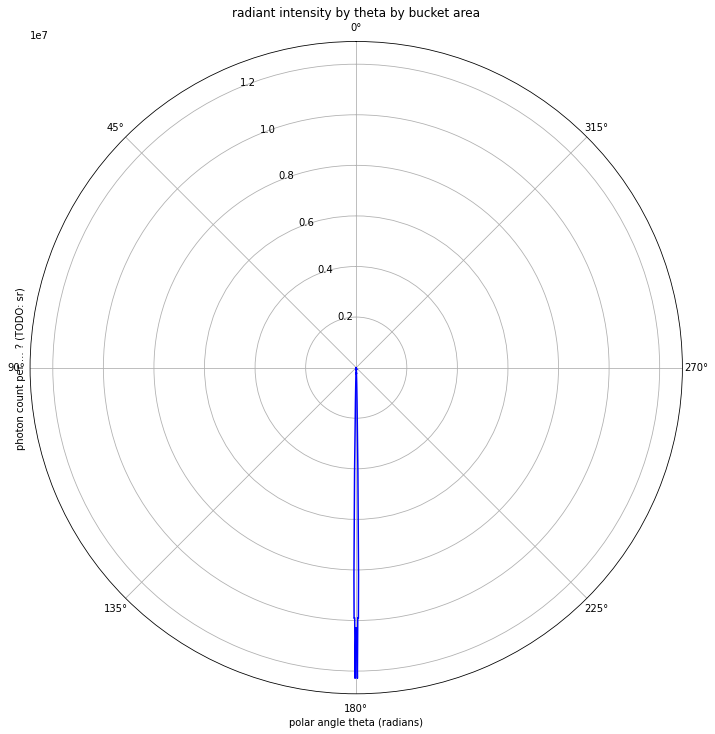

Output()

In [8]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 1353


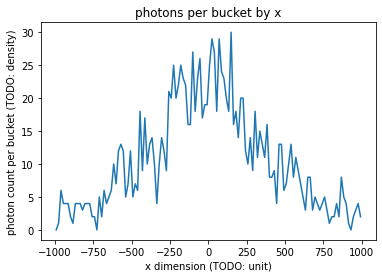

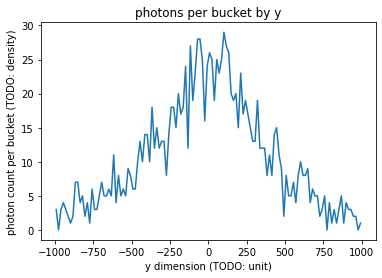

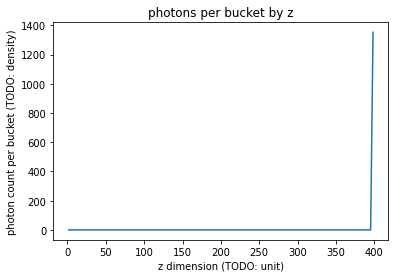

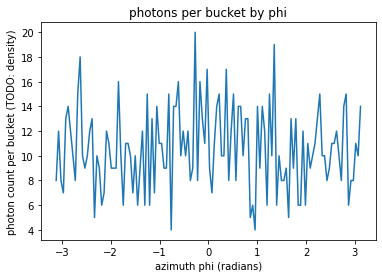

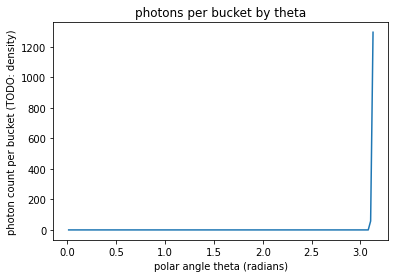

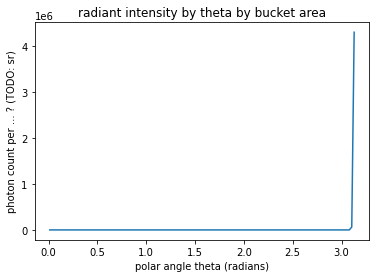

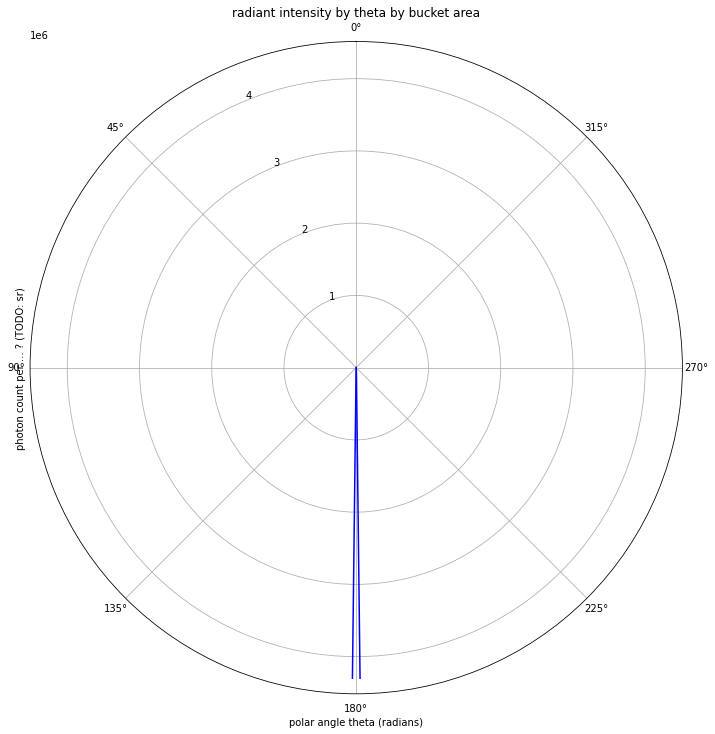

Output()

In [9]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)